# Analisis Exploratorio

El analisis exploratorio se usa para i obtener un resumen que describa los datos. Generalmente se usa como etapa previa para otros tipos de analisis y generalmente se usan histogramas y graficos que muestren la relacion entre las distintas variables. Al mismo tiempo, nos interesa  

In [1]:
import pandas as pd
pd.__version__

'1.0.5'

In [2]:
data = {'year': 
        [2010 , 2011 , 2012 ,
        2010 , 2011 , 2012 ,
        2010 , 2011 , 2012],
        'team': [
        'Rangers','Rangers',
        'Rangers','Colo Colo',
        'Colo Colo','Colo Colo',
        'Universidad de Chile','Universidad de Chile',
        'Universidad de Chile'],
        'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
        'draws':[6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
        'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
        }

df = pd.DataFrame(data ,columns=['year','team','wins','draws','losses'])

In [3]:
df.head()

,year,team,wins,draws,losses
0,2010,Rangers,30,6,2
1,2011,Rangers,28,7,3
2,2012,Rangers,32,4,2
3,2010,Colo Colo,29,5,4
4,2011,Colo Colo,32,4,2


In [4]:
df.dtypes

year       int64
team      object
wins       int64
draws      int64
losses     int64
dtype: object

In [5]:
df['team'] = df['team'].astype('category')
df['year']=pd.to_datetime(df['year'], format='%Y')

In [6]:
df.dtypes

year      datetime64[ns]
team            category
wins               int64
draws              int64
losses             int64
dtype: object

La tabla ``df`` se encuentra indexada mediante un objeto del tipo ``pd.Index`` que nos sirve para acceder a los registros individuales.

In [7]:
print(df.index)

RangeIndex(start=0, stop=9, step=1)


In [108]:
df[df.index==0]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2


In [109]:
df.iloc[0]

year      2010-01-01 00:00:00
team                  Rangers
wins                       30
draws                       6
losses                      2
Name: 0, dtype: object

In [110]:
df[0:2]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2
1,2011-01-01,Rangers,28,7,3


In [113]:
sum_data=df.groupby('team').sum()

In [114]:
print(sum_data)

                      wins  draws  losses
team                                     
Colo Colo               87     16      11
Rangers                 90     17       7
Universidad de Chile    57     26      31


In [115]:
sum_data.index

CategoricalIndex(['Colo Colo', 'Rangers', 'Universidad de Chile'], categories=['Colo Colo', 'Rangers', 'Universidad de Chile'], ordered=False, name='team', dtype='category')

# Analisis Exploratorio de Casos COVID 

En este laboratorio realizaremos un analisis exploratorio de casos confirmados de COVID-19. Para ello, accederemos a las API del Centro Europeo para la Prevencion y Control de Enfermedades (https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [189]:
import requests 
import json

response=requests.get('https://opendata.ecdc.europa.eu/covid19/casedistribution/json/')

if response.status_code==200:
    s=json.loads(response.text,encoding='utf-8',strict=False)
    data=pd.DataFrame(s['records'])
    data.to_csv('covid_data.csv')
else:
    data=pd.read_csv('covid_data.csv')

In [190]:
data.iloc[0]

dateRep                     26/06/2020
day                                 26
month                               06
year                              2020
cases                              460
deaths                              36
countriesAndTerritories    Afghanistan
geoId                               AF
countryterritoryCode               AFG
popData2019                3.80418e+07
continentExp                      Asia
Name: 0, dtype: object

In [191]:
data.dtypes

dateRep                     object
day                         object
month                       object
year                        object
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2019                float64
continentExp                object
dtype: object

In [192]:
data['dateRep']=pd.to_datetime(data['dateRep'],infer_datetime_format=True)

In [66]:
data.dtypes

dateRep                    datetime64[ns]
day                                object
month                              object
year                               object
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2019                       float64
continentExp                       object
dtype: object

In [193]:
data['countriesAndTerritories'] = data['countriesAndTerritories'].astype('category')
data['geoId'] = data['geoId'].astype('category')
data['countryterritoryCode'] = data['countryterritoryCode'].astype('category')
data['continentExp'] = data['continentExp'].astype('category')
data.drop(['day','month','year'],axis=1,inplace=True)

In [174]:
data.dtypes

dateRep                    datetime64[ns]
cases                               int64
deaths                              int64
countriesAndTerritories          category
geoId                            category
countryterritoryCode             category
popData2019                       float64
continentExp                     category
dtype: object

In [194]:
data['continentExp'].unique()

[Asia, Europe, Africa, America, Oceania, Other]
Categories (6, object): [Asia, Europe, Africa, America, Oceania, Other]

In [195]:
latin_america=data[data['continentExp']=='America']

In [196]:
latin_america.head()

,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
655,2020-06-26,0,0,Anguilla,AI,AIA,14872.0,America
656,2020-06-25,0,0,Anguilla,AI,AIA,14872.0,America
657,2020-06-24,0,0,Anguilla,AI,AIA,14872.0,America
658,2020-06-23,0,0,Anguilla,AI,AIA,14872.0,America
659,2020-06-22,0,0,Anguilla,AI,AIA,14872.0,America


In [146]:
latin_america['countryterritoryCode'].unique()

[AIA, ATG, ARG, ABW, BHS, ..., TCA, USA, VIR, URY, VEN]
Length: 49
Categories (49, object): [AIA, ATG, ARG, ABW, ..., USA, VIR, URY, VEN]

In [203]:
sum_america=latin_america[['countriesAndTerritories','cases']].groupby('countriesAndTerritories').sum()

In [204]:
sum_america.sort_values(by=['cases'],inplace=True,ascending=False)

In [205]:
sum_america.head(10)

,cases
countriesAndTerritories,
United_States_of_America,2422310
Brazil,1228114
Peru,268602
Chile,259064
Mexico,202951
Canada,102611
Colombia,80599
Ecuador,53156
Argentina,52444


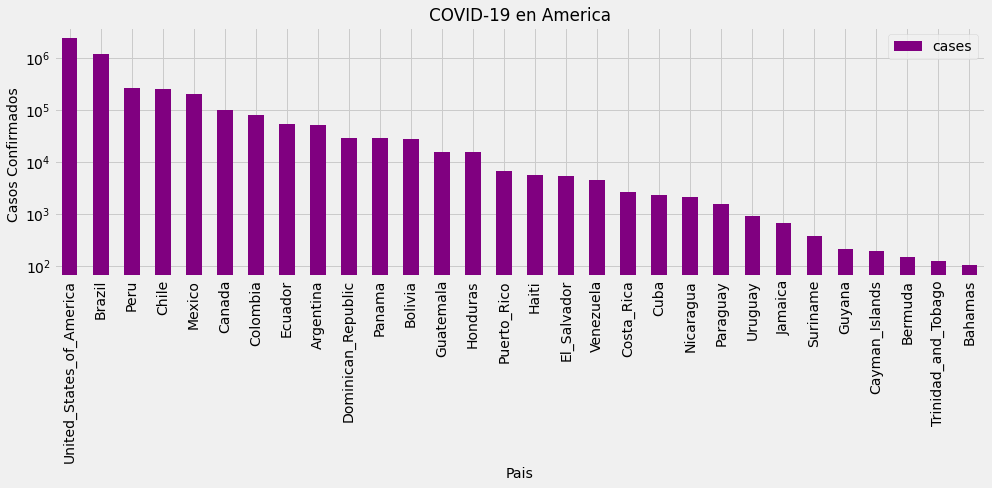

In [209]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'log'

sum_america.head(30).plot(ax=ax, kind="bar", color='purple')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en America', fontsize='large')
ax.set_xlabel(f'Pais', fontsize='medium')
ax.set_ylabel(f'Casos Confirmados ', fontsize='medium')

plt.show()